In [1]:

import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import kagglehub
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import tensorflow as tf


In [2]:
# Download data
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/user/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [3]:
#assign directories for test and train path
train_dir = path + r'/Training/'
test_dir = path + r'/Testing/'

In [4]:
train_file_path= []
test_file_path= []
filepaths = []
labels_test = []
lables_train =[]


folds_train = os.listdir(train_dir)
folds_test = os.listdir(test_dir)


# store data in dataframe 
def data_to_df(data, dir,filepaths,labels):
    for fold in data:
        foldpath = os.path.join(dir, fold)
    
        files = os.listdir(foldpath)
        for f in files:
            fpath = os.path.join(foldpath, f)
        
            filepaths.append(fpath)
            labels.append(fold)
        

    df = pd.DataFrame(data={'filepaths':filepaths, 'labels':labels})
    return df


In [5]:
# convert folds and directories to dataframe by using data_to_df function
train = data_to_df(folds_train, train_dir,train_file_path,lables_train)
test = data_to_df(folds_test, test_dir, test_file_path,labels_test)

In [6]:
#check length of data
print(len(train))
print(len(test))

5712
1311


In [7]:
#view the dataframe
train

,filepaths,labels
0,/Users/user/.cache/kagglehub/datasets/masoudni...,pituitary
1,/Users/user/.cache/kagglehub/datasets/masoudni...,pituitary
2,/Users/user/.cache/kagglehub/datasets/masoudni...,pituitary
3,/Users/user/.cache/kagglehub/datasets/masoudni...,pituitary
4,/Users/user/.cache/kagglehub/datasets/masoudni...,pituitary
...,...,...
5707,/Users/user/.cache/kagglehub/datasets/masoudni...,meningioma
5708,/Users/user/.cache/kagglehub/datasets/masoudni...,meningioma
5709,/Users/user/.cache/kagglehub/datasets/masoudni...,meningioma
5710,/Users/user/.cache/kagglehub/datasets/masoudni...,meningioma


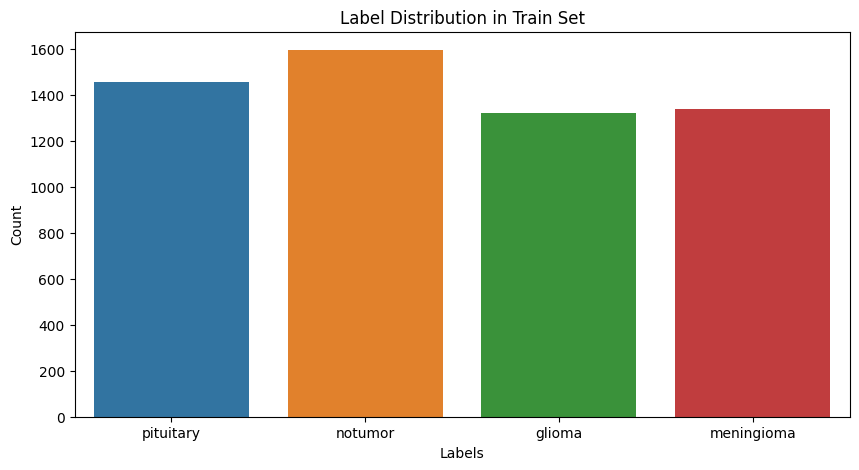

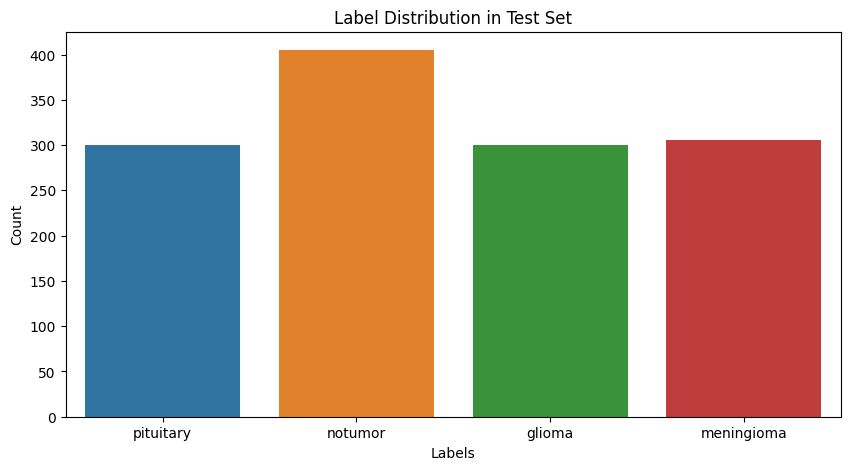

In [8]:
import seaborn as sns
#check distribution is labels and data balance in the train and test subset
# Count plot for train set
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='labels', hue = 'labels')
plt.title("Label Distribution in Train Set")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

# Count plot for test set
plt.figure(figsize=(10, 5))
sns.countplot(data=test, x='labels',hue = 'labels')
plt.title("Label Distribution in Test Set")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

# data seems in both dataframes fairly balanced, due to the small size of the data, the data was not balanced out more

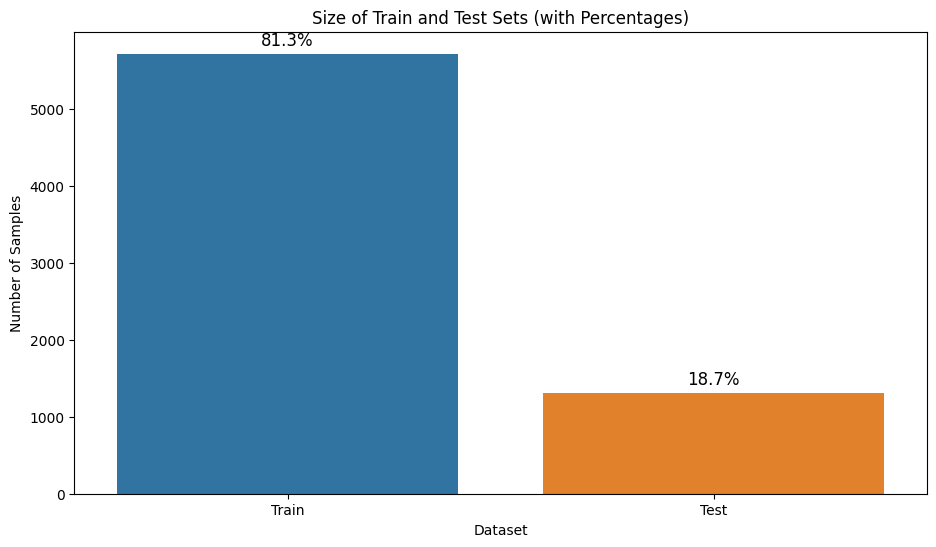

In [9]:
# Visualize the size of train and test sets

# Calculate the sizes of the train and test sets
total_samples = len(train) + len(test)

data_sizes = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'Size': [len(train), len(test)]
})

# Calculate the percentage sizes of the train and test sets

data_sizes['Percentage'] = (data_sizes['Size'] / total_samples) * 100

# Plotting the sizes in absolute values and percentages

plt.figure(figsize=(11, 6))

sns.barplot(data=data_sizes, x='Set', y='Size', hue= 'Set')

for i, (size, percentage) in enumerate(zip(data_sizes['Size'], data_sizes['Percentage'])):

    plt.text(i, size + 50, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=12)



plt.title("Size of Train and Test Sets (with Percentages)")

plt.xlabel("Dataset")

plt.ylabel("Number of Samples")

plt.show()


In [10]:
#function to 

def show_image(df, num_images):
    """
    Displays a specified number of images along with their labels from a given DataFrame.

    Parameters:
    ----------
    df : pandas.DataFrame
        A DataFrame containing the image file paths and corresponding labels. 
        It must include the following columns:
        - 'filepaths': Column with the file paths to the images.
        - 'labels': Column with the labels for the images.
    
    num_images : int
        The number of images to display. Displays the first `num_images` entries from the DataFrame.

    Returns:
    -------
    None
        The function displays the images with their corresponding labels and does not return anything."""
        
    for i in range(num_images):
        image_path = df['filepaths'][i]  
        img = Image.open(image_path)     
    
        # Display the image
        plt.figure(figsize=(2, 2))       
        plt.imshow(img)
        plt.title(df['labels'][i])       
        plt.show()


In [11]:
#load ans process images from directories, load images from trest and train directory in one list
xtrain = []
ytrain = []
labels = ['glioma','notumor','meningioma','pituitary']


image_size = 150
for i in labels:
    folderPath = os.path.join(train_dir,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        xtrain.append(img)
        ytrain.append(i)
        
for i in labels:
    folderPath = os.path.join(test_dir,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        xtrain.append(img)
        ytrain.append(i)
        
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

100%|██████████| 300/300 [00:00<00:00, 1717.96it/s]


In [12]:
# check shape
xtrain.shape

(7023, 150, 150, 3)

In [13]:
#check shape
ytrain.shape

(7023,)

In [14]:
# split train and test with 80% training data and 20% used for validation
xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.20)

In [15]:
#check shape of split datasets
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(5618, 150, 150, 3)
(1405, 150, 150, 3)
(5618,)
(1405,)


In [16]:
ytest

array(['glioma', 'glioma', 'glioma', ..., 'glioma', 'pituitary',
       'meningioma'], dtype='<U10')

In [17]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform ytest to get integer labels
ytest_integers = label_encoder.fit_transform(ytest)
ytrain_integers = label_encoder.fit_transform(ytrain)

# Now convert these integer labels to one-hot encoding
num_classestest = len(np.unique(ytest_integers)) 
num_classestrain = len(np.unique(ytrain_integers))
ytest = tf.keras.utils.to_categorical(ytest_integers, num_classes=num_classestest)
ytrain=tf.keras.utils.to_categorical(ytrain_integers, num_classes=num_classestrain)


In [18]:
ytrain

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [19]:
ytest

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [20]:
np.save('ytrain.npy',ytrain)
np.save('ytest.npy', ytest)
np.save('xtest.npy',xtest)
np.save('xtrain.npy', xtrain)


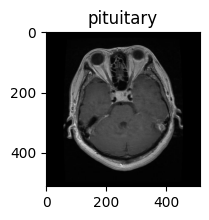

In [21]:
#depict images from train subset
show_image(train,1)

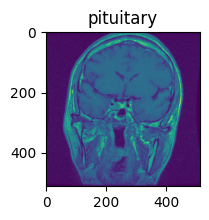

In [22]:
#depict image from test/validation subset
show_image(test,1)

In [23]:
# check if there are any dublicates whithin thain subset 
print(train.describe)
test.duplicated().sum()

<bound method NDFrame.describe of                                               filepaths      labels
0     /Users/user/.cache/kagglehub/datasets/masoudni...   pituitary
1     /Users/user/.cache/kagglehub/datasets/masoudni...   pituitary
2     /Users/user/.cache/kagglehub/datasets/masoudni...   pituitary
3     /Users/user/.cache/kagglehub/datasets/masoudni...   pituitary
4     /Users/user/.cache/kagglehub/datasets/masoudni...   pituitary
...                                                 ...         ...
5707  /Users/user/.cache/kagglehub/datasets/masoudni...  meningioma
5708  /Users/user/.cache/kagglehub/datasets/masoudni...  meningioma
5709  /Users/user/.cache/kagglehub/datasets/masoudni...  meningioma
5710  /Users/user/.cache/kagglehub/datasets/masoudni...  meningioma
5711  /Users/user/.cache/kagglehub/datasets/masoudni...  meningioma

[5712 rows x 2 columns]>


np.int64(0)

In [24]:
#check for dublicates in train subsets
train.duplicated().sum()

np.int64(0)